In [10]:
from matplotlib import pyplot as plt
import numpy as np
import os

In [11]:
ls '/mnt/bluewhale/evam/S8z/'

DES_Cls_0_0.txt  DES_Cls_0_4.txt  DES_Cls_1_4.txt  DES_Cls_3_3.txt
DES_Cls_0_1.txt  DES_Cls_1_1.txt  DES_Cls_2_2.txt  DES_Cls_3_4.txt
DES_Cls_0_2.txt  DES_Cls_1_2.txt  DES_Cls_2_3.txt  DES_Cls_4_4.txt
DES_Cls_0_3.txt  DES_Cls_1_3.txt  DES_Cls_2_4.txt


In [12]:
outdir = '../Cls/outputs' 
th_outdir = '/mnt/bluewhale/evam/S8z/'

In [13]:
def load_thcls(th_outdir):
    cls_arr = []
    for i in range(5):
        for j in range(i, 5):
            fname = os.path.join(th_outdir, 'DES_Cls_{}_{}.txt'.format(i, j))
            cls_arr.append(np.loadtxt(fname, usecols=1))
            
    ell = np.loadtxt(fname, usecols=0)
    
    return ell, np.array(cls_arr)

In [14]:
th_ell, th_cls_arr = load_thcls(th_outdir)

In [15]:
cls_file = np.load(os.path.join(outdir, 'des_cl_ns4096.npz'))
ell = cls_file['l']
cls = cls_file['cls']
cls_arr = cls[np.triu_indices(cls.shape[0])]
nls_arr = np.load(os.path.join(outdir, 'des_cl_shot_noise_ns4096.npz'))['cls']

In [16]:
w_cls_file = np.load(os.path.join(outdir, 'des_w_cl_ns4096.npz'))
w_ell = w_cls_file['l']
w_cls = w_cls_file['cls']
w_cls_arr = w_cls[np.triu_indices(cls.shape[0])]
w_nls_arr = np.load(os.path.join(outdir, 'des_w_cl_shot_noise_ns4096.npz'))['cls']

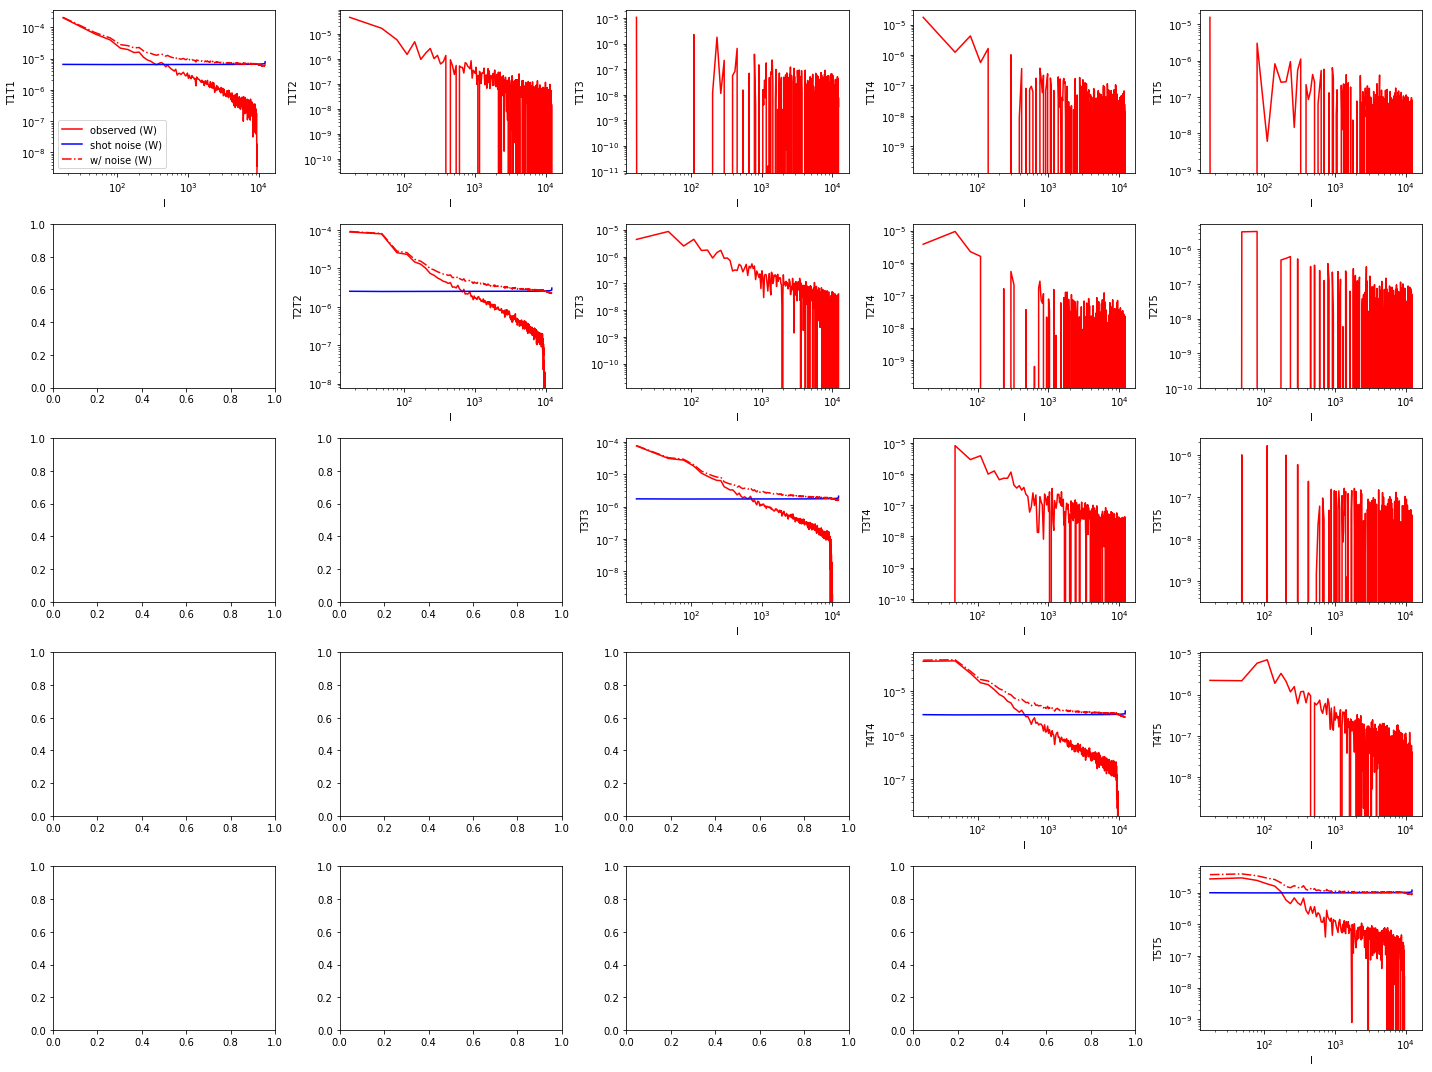

In [17]:
f, axs = plt.subplots(5, 5, figsize=(20, 15))

labels = ["T1T1", "T1T2", "T1T3", "T1T4", "T1T5",
                  "T2T2", "T2T3", "T2T4", "T2T5",
                          "T3T3", "T3T4", "T3T5",
                                  "T4T4", "T4T5",
                                          "T5T5"]

for cl, ax, lab in zip(w_cls_arr, axs[np.triu_indices(cls.shape[0])], labels):
    ax.plot(ell, cl,'r-', label='observed (W)')
    ax.set_ylabel(lab)
    ax.set_xlabel('l')
    ax.loglog()
    
for i, nl in enumerate(w_nls_arr):
    axs[i, i].plot(ell, nl, 'b-', label='shot noise (W)')
    axs[i, i].plot(ell, w_cls[i, i] + nl, 'r-.', label='w/ noise (W)')
    # axs[i, i].set_yscale('linear')


# for cl, ax, lab in zip(cls_arr, axs[np.triu_indices(cls.shape[0])], labels):
#     ax.plot(ell, cl,'g-', label='observed')
#     ax.set_ylabel(lab)
#     ax.set_xlabel('l')
#     ax.loglog()
    
# for i, nl in enumerate(nls_arr):
#     axs[i, i].plot(ell, nl, 'b.-', label='shot noise')
#     axs[i, i].plot(ell, cls[i, i] + nl, 'g-.', label='w/ noise')
#     # axs[i, i].set_yscale('linear')
    
axs[0,0].legend(loc=0)
plt.tight_layout()
plt.show()
plt.close()

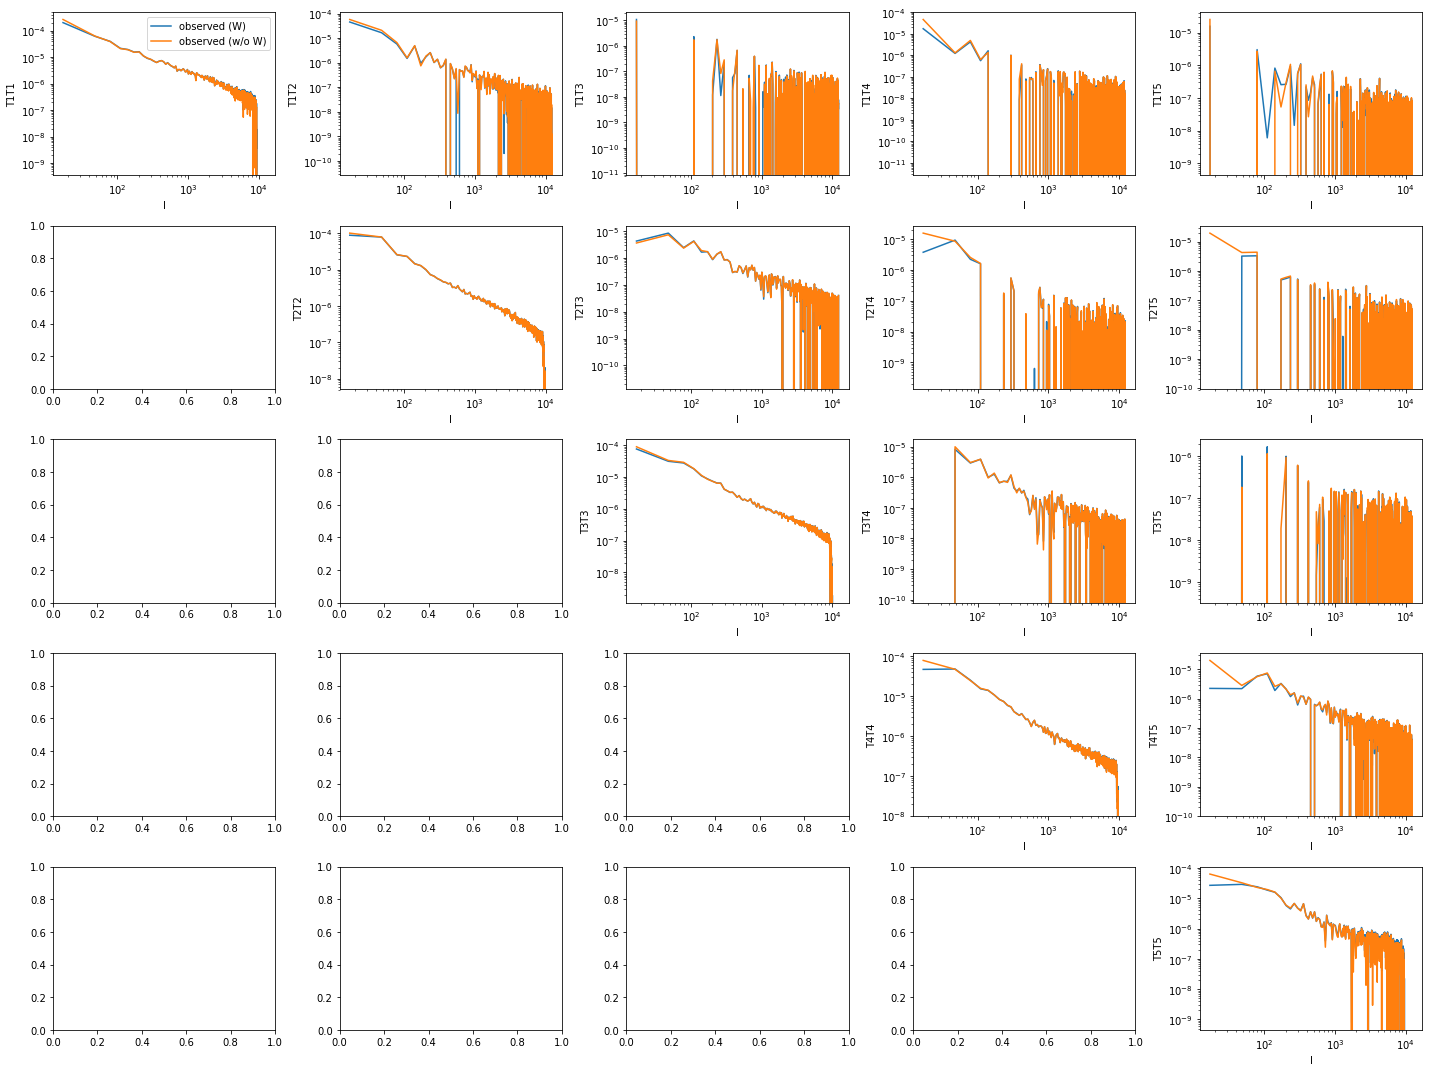

In [18]:
f, axs = plt.subplots(5, 5, figsize=(20, 15))

labels = ["T1T1", "T1T2", "T1T3", "T1T4", "T1T5",
                  "T2T2", "T2T3", "T2T4", "T2T5",
                          "T3T3", "T3T4", "T3T5",
                                  "T4T4", "T4T5",
                                          "T5T5"]

for w_cl, cl, ax, lab in zip(w_cls_arr, cls_arr, axs[np.triu_indices(cls.shape[0])], labels):
    ax.plot(ell, w_cl, label='observed (W)')
    ax.plot(ell, cl, label='observed (w/o W)')
    ax.set_ylabel(lab)
    ax.set_xlabel('l')
    ax.loglog()
    
axs[0,0].legend(loc=0)
plt.tight_layout()
plt.show()
plt.close()

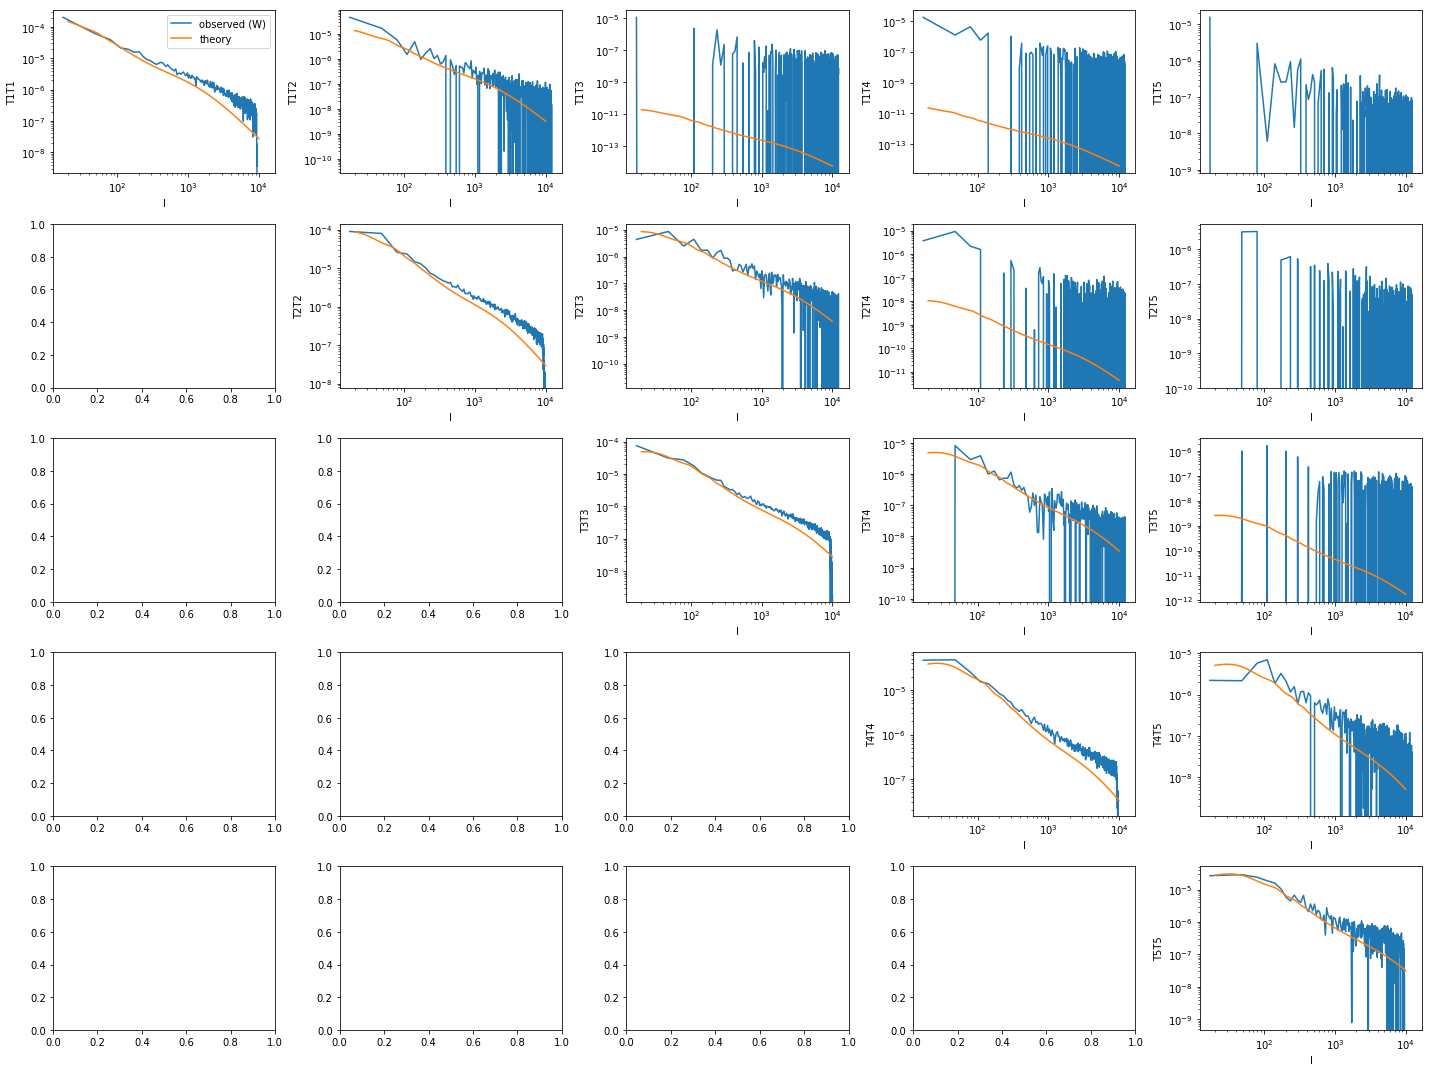

In [12]:
f, axs = plt.subplots(5, 5, figsize=(20, 15))

labels = ["T1T1", "T1T2", "T1T3", "T1T4", "T1T5",
                  "T2T2", "T2T3", "T2T4", "T2T5",
                          "T3T3", "T3T4", "T3T5",
                                  "T4T4", "T4T5",
                                          "T5T5"]

for w_cl, cl, ax, lab in zip(w_cls_arr, th_cls_arr, axs[np.triu_indices(cls.shape[0])], labels):
    ax.plot(ell, w_cl, label='observed (W)')
    ax.plot(th_ell, cl, label='theory')
    ax.set_ylabel(lab)
    ax.set_xlabel('l')
    ax.loglog()
    
axs[0,0].legend(loc=0)
plt.tight_layout()
plt.show()
plt.close()